In [28]:
using Plots
plotlyjs(size=(600,400))
plot(rand(3),rand(3))
nothing

┌ Info: Precompiling PlotlyJS [f0f68f2c-4968-5e81-91da-67840de0976a]
└ @ Base loading.jl:1260


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-14637977634077253535\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-2116900959105572273\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-14637977634077253535\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Precompiling ORCA [47be7bcc-f1a6-5447-8b36-7eeeff7534fd]
└ @ Base loading.jl:1260


In [2]:
using Pkg
pkg"add Ipopt"

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %                          ]  34.5 %Fetching: [======================>                  ]  53.8 %Fetching: [===========================>             ]  67.3 %     ]  86.4 %Fetching: [======================================>  ]  94.6 %

  Resolving package versions...
  Installed Crayons ────────── v4.0.2
  Installed SimpleTraits ───── v0.9.2
  Installed StringDistances ── v0.6.4
  Installed AxisArrays ─────── v0.4.3
  Installed ImageMetadata ──── v0.9.1
  Installed JuliaFormatter ─── v0.5.3
  Installed Documenter ─────── v0.24.11
  Installed SpecialFunctions ─ v0.10.2
  Installed Libtiff_jll ────── v4.1.0+0
  Installed UnPack ─────────── v1.0.1
  Installed Parameters ─────── v0.12.1
  Installed Parsers ────────── v1.0.4
  Installed Zlib_jll ───────── v1.2.11+10
  Installed CodeTracking ───── v0.5.11
  Installed IntervalSets ───── v0.5.1
  Installed JuliaInterpreter ─ v0.7.16
  Installed Compat ─────────── v3.10.0
  Installed ZeroMQ_jll ─────── v4.3.2+3
  Installed FuzzyCompletions ─ v0.1.0
  Installed DataStructures ─── v0.17.16
  Installed Contour ────────── v0.5.3
  Installed WebIO ──────────── v0.8.14
  Installed LoweredCodeUtils ─ v0.4.5
  Installed CSTParser ──────── v2.3.0
  Installed FFTW ───────────── v1.2.1


In [3]:
using JuMP, Ipopt

┌ Info: Precompiling JuMP [4076af6c-e467-56ae-b986-b466b2749572]
└ @ Base loading.jl:1260
┌ Info: Precompiling Ipopt [b6b21f68-93f8-5de0-b562-5493be1d77c9]
└ @ Base loading.jl:1260


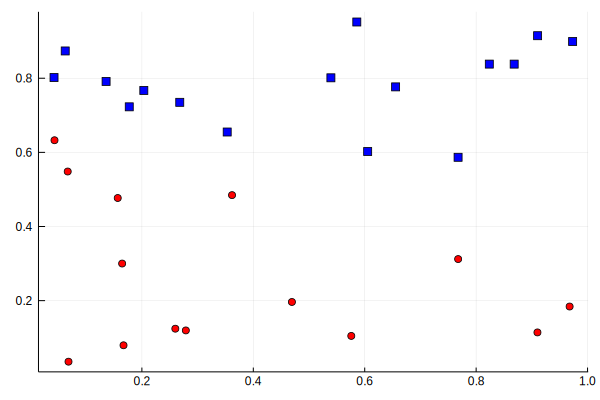

In [68]:
using Random, LinearAlgebra

Random.seed!(0)

n = 30
X = rand(n, 2)
w_sol = [0.3; 0.7]
b_sol = -0.5
y = [dot(w_sol, X[i,:]) + b_sol > 0 ? 1 : -1 for i = 1:n]

plot(leg=false)
I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

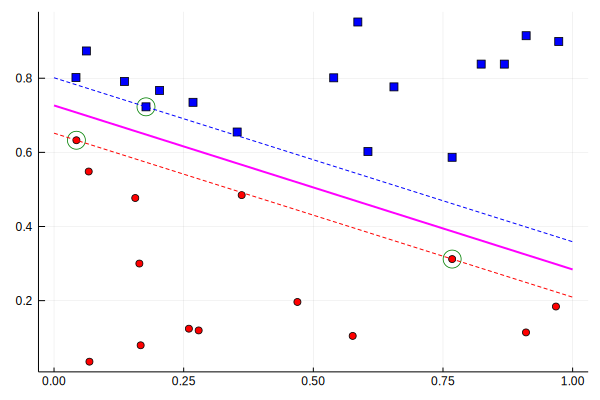

In [83]:
using JuMP, Ipopt

model = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level"=>0))

@variable(model, w[1:2])
@variable(model, b)

@objective(model, Min, dot(w, w) / 2)

@constraint(model, restr[i=1:n], (dot(w, X[i,:]) + b) * y[i] ≥ 1)

#print(model)

optimize!(model)

w, b = value.(w), value(b)

plot(leg=false)

α = dual.(restr)
I = findall(α .> 1e-6)
scatter!(X[I,1], X[I,2], c=:green, m=(:white,stroke(1,:green),10))

I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

plot!(x -> -(w[1] * x + b) / w[2], 0, 1, c=:magenta, lw=2)
plot!(x -> -(w[1] * x + b - 1) / w[2], 0, 1, c=:blue, l=:dash)
plot!(x -> -(w[1] * x + b + 1) / w[2], 0, 1, c=:red, l=:dash)



In [77]:
findall(α .> 1e-6)

3-element Array{Int64,1}:
  4
 20
 25

In [81]:
dot(w, X[25,:]) + b, y[25]

(-0.9999999900262804, -1)

In [6]:
w, b

([5.917754103276014, 13.376069868373918], -9.718277405139164)

In [7]:
w ./ w_sol, b / b_sol

([19.72584701092005, 19.108671240534168], 19.436554810278327)

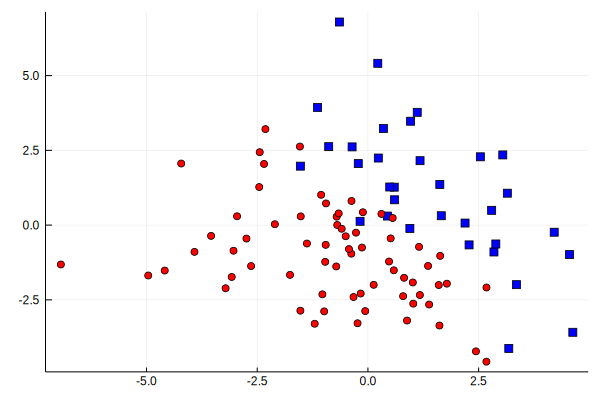

In [84]:
using Random, LinearAlgebra

Random.seed!(0)
n = 100
X = randn(n, 2) * 2
w_sol = [0.5; 0.4]
b_sol = -0.5
y = [dot(w_sol, X[i,:]) + b_sol > randn() * 0.5 ? 1 : -1 for i = 1:n]

plot(leg=false)
I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

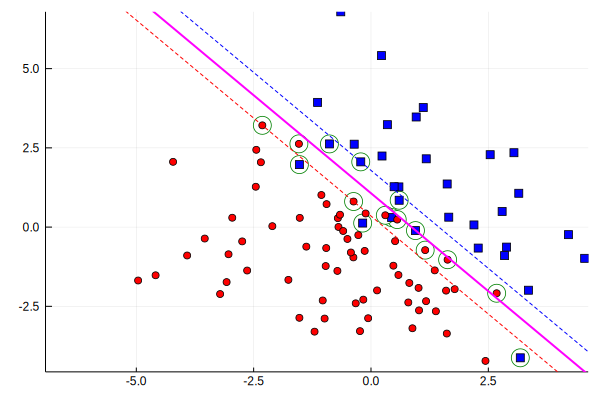

In [95]:
using JuMP, Ipopt

model = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level"=>0))

@variable(model, w[1:2])
@variable(model, b)

@objective(model, Min, dot(w, w) / 2)

@constraint(model, restr[i=1:n], (dot(w, X[i,:]) + b) * y[i] ≥ 1)

#print(model)

optimize!(model)

w, b = value.(w), value(b)

plot(leg=false)

α = dual.(restr)
I = findall(α .> 1e-6)
scatter!(X[I,1], X[I,2], c=:green, m=(:white,stroke(1,:green),10))

I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

plot!(x -> -(w[1] * x + b) / w[2], extrema(X[:,1])..., c=:magenta, lw=2)
plot!(x -> -(w[1] * x + b - 1) / w[2], extrema(X[:,1])..., c=:blue, l=:dash)
plot!(x -> -(w[1] * x + b + 1) / w[2], extrema(X[:,1])..., c=:red, l=:dash)
xlims!(extrema(X[:,1])...)
ylims!(extrema(X[:,2])...)

In [10]:
termination_status(model)

LOCALLY_INFEASIBLE::TerminationStatusCode = 5

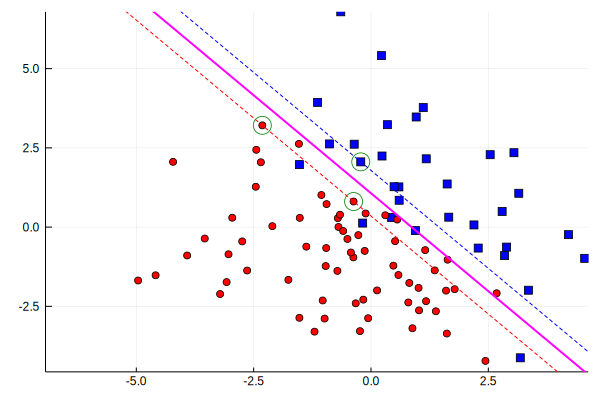

In [104]:
using JuMP, Ipopt

C = 1e3

model = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level"=>0))

@variable(model, w[1:2])
@variable(model, b)
@variable(model, ξ[1:n] ≥ 0)

@objective(model, Min, dot(w, w) / 2 + C * sum(ξ))

@constraint(model, restr[i=1:n], (dot(w, X[i,:]) + b) * y[i] ≥ 1 - ξ[i])

#print(model)

optimize!(model)

w, b, ξ = value.(w), value(b), value.(ξ)

plot(leg=false)

α = dual.(restr)
I = findall(1e-4 .< α .< C - 1e-4)
#I = findall(1e-4 .< α)
scatter!(X[I,1], X[I,2], c=:green, m=(:white,stroke(1,:green),10))

I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

plot!(x -> -(w[1] * x + b) / w[2], extrema(X[:,1])..., c=:magenta, lw=2)
plot!(x -> -(w[1] * x + b - 1) / w[2], extrema(X[:,1])..., c=:blue, l=:dash)
plot!(x -> -(w[1] * x + b + 1) / w[2], extrema(X[:,1])..., c=:red, l=:dash)

xlims!(extrema(X[:,1])...)
ylims!(extrema(X[:,2])...)

In [102]:
sort(α, rev=true)

100-element Array{Float64,1}:
 999.9999999908825
 999.9999999904057
 999.9999999894048
 999.9999999808604
 999.9999999793799
 999.9999999751874
 999.9999999718392
 999.9999999688781
 999.9999999551017
 999.9999999523961
 999.9999999487661
 999.9999999304764
 999.9999999094773
   ⋮
   4.049989193220762e-9
   3.639402621877031e-9
   3.623047379532399e-9
   3.5459410066792206e-9
   3.540711463644053e-9
   3.51470962704096e-9
   3.0654034281340083e-9
   2.964462350238708e-9
   2.804190682754723e-9
   2.39233731987031e-9
   2.2091725678913125e-9
   1.7621461283630121e-9

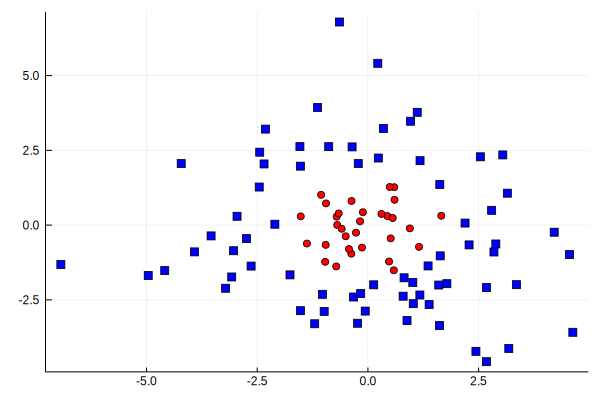

In [112]:
using Random, LinearAlgebra

Random.seed!(0)

n = 100
X = randn(n, 2) * 2
y = [X[i,1]^2 + X[i,2]^2 > 3.5 ? 1 : -1 for i = 1:n]

plot(leg=false)
I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

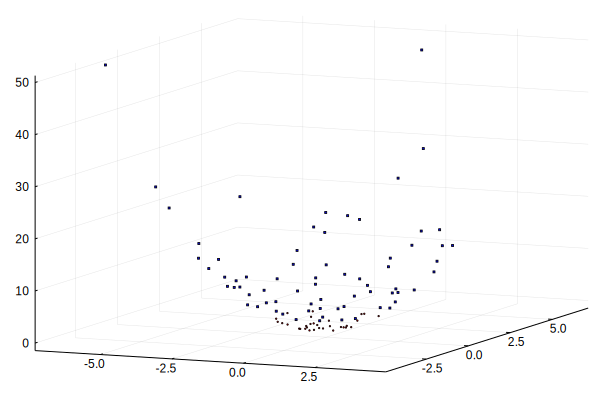

In [113]:
ϕX = [X X[:,1].^2 + X[:,2].^2] # (x₁, x₂) → (x₁, x₂, x₁²+x₂²)

plot(leg=false)
I = findall(y .== 1)
scatter!(ϕX[I,1], ϕX[I,2], ϕX[I,3], c=:blue, m=:square, ms=1)
I = findall(y .== -1)
scatter!(ϕX[I,1], ϕX[I,2], ϕX[I,3], c=:red, m=:circle, ms=1)

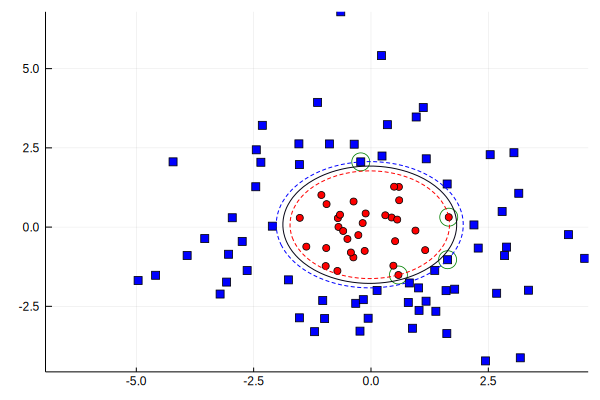

In [114]:
using JuMP, Ipopt
gr()

model = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level"=>0))

ϕ(x) = [x[1], x[2], x[1]^2 + x[2]^2]
p = 3

@variable(model, w[1:p])
@variable(model, b)
@variable(model, ξ[1:n] ≥ 0)

@objective(model, Min, dot(w, w) / 2)

@constraint(model, restr[i=1:n], (dot(w, ϕ(X[i,:])) + b) * y[i] ≥ 1)

#print(model)

optimize!(model)

w, b = value.(w), value(b)

plot(leg=false)

α = dual.(restr)
#I = findall(1e-4 .< α .< C - 1e-4)
I = findall(1e-4 .< α)
scatter!(X[I,1], X[I,2], c=:green, m=(:white,stroke(1,:green),10))

I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

x1g = range(extrema(X[:,1])..., length=100)
x2g = range(extrema(X[:,2])..., length=100)

contour!(x1g, x2g, (x1, x2) -> dot(w, ϕ([x1; x2])) + b, levels=[0.0])
contour!(x1g, x2g, (x1, x2) -> dot(w, ϕ([x1; x2])) + b, levels=[1.0], c=:blue, l=:dash)
contour!(x1g, x2g, (x1, x2) -> dot(w, ϕ([x1; x2])) + b, levels=[-1.0], c=:red, l=:dash)

xlims!(extrema(X[:,1])...)
ylims!(extrema(X[:,2])...)

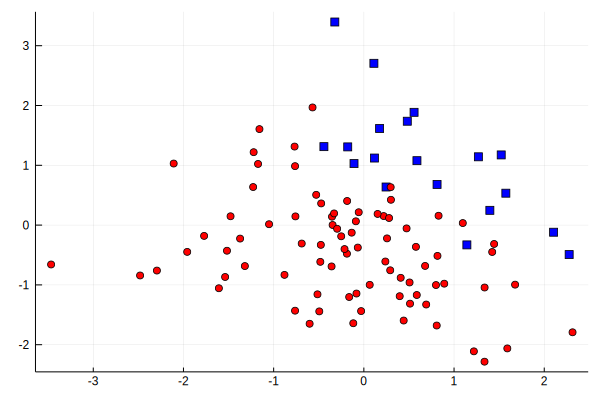

In [116]:
using Random, LinearAlgebra

Random.seed!(0)
n = 100
X = randn(n, 2)
w_sol = [0.5; 0.4]
b_sol = -0.5
y = [dot(w_sol, X[i,:]) + b_sol > randn() * 0.3 ? 1 : -1 for i = 1:n]

plot(leg=false)
I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

LOCALLY_SOLVED

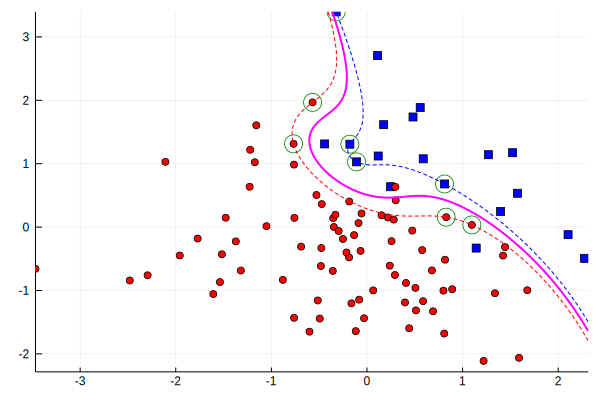

In [119]:
using JuMP, Ipopt
gr()

model = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level"=>0))

ϕ(x) = [x[1], x[2], x[1]^2, x[2]^2, x[1] * x[2], x[1]^3, x[1]^2 * x[2], x[1] * x[2]^2, x[2]^3]
p = 9
C = 1.0e3

@variable(model, w[1:p])
@variable(model, b)
@variable(model, ξ[1:n] ≥ 0)

# p + 1 + n

@objective(model, Min, dot(w, w) / 2 + C * sum(ξ))

@constraint(model, restr[i=1:n], (dot(w, ϕ(X[i,:])) + b) * y[i] ≥ 1 - ξ[i])

# n

#print(model)

optimize!(model)

w, b, ξ = value.(w), value(b), value.(ξ)

print(termination_status(model))

plot(leg=false)

α = dual.(restr)
I = findall(1e-4 .< α .< C - 1e-4)
#I = findall(1e-4 .< α)
scatter!(X[I,1], X[I,2], c=:green, m=(:white,stroke(1,:green),10))

I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

x1g = range(extrema(X[:,1])..., length=400)
x2g = range(extrema(X[:,2])..., length=400)

contour!(x1g, x2g, (x1, x2) -> dot(w, ϕ([x1; x2])) + b, levels=[0.0], c=:magenta, lw=2)
contour!(x1g, x2g, (x1, x2) -> dot(w, ϕ([x1; x2])) + b, levels=[1.0], c=:blue, l=:dash)
contour!(x1g, x2g, (x1, x2) -> dot(w, ϕ([x1; x2])) + b, levels=[-1.0], c=:red, l=:dash)

xlims!(extrema(X[:,1])...)
ylims!(extrema(X[:,2])...)

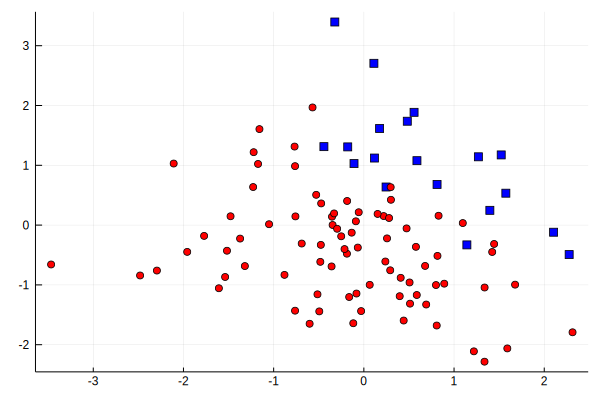

In [136]:
using Random, LinearAlgebra

Random.seed!(0)
n = 100
X = randn(n, 2)
w_sol = [0.5; 0.4]
b_sol = -0.5
y = [dot(w_sol, X[i,:]) + b_sol > randn() * 0.3 ? 1 : -1 for i = 1:n]

plot(leg=false)
I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

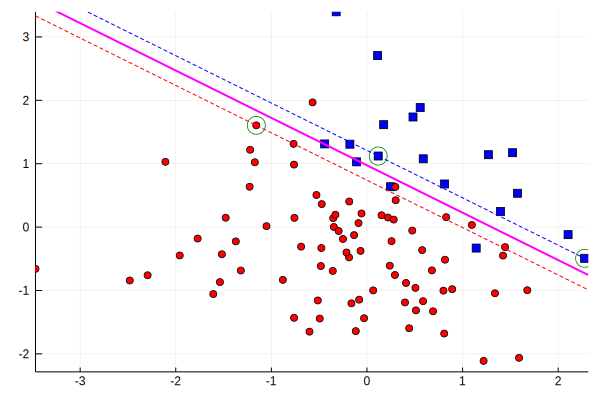

In [137]:
using JuMP, Ipopt

C = 1e2

model = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0))

@variable(model, 0 ≤ α[i=1:n] ≤ C)

@objective(model, Max, sum(α) -
    0.5 * sum(α[i] * α[j] * y[i] * y[j] * dot(X[i,:], X[j,:]) for i = 1:n, j = 1:n))
@constraint(model, sum(α .* y) == 0)

optimize!(model)


plot(leg=false)

α = value.(α)
I = findall(1e-4 .< α .< C - 1e-4)

w = sum(α[i] * y[i] * X[i,:] for i = 1:n)
k = I[1]
b = y[k] - dot(w, X[k,:])

scatter!(X[I,1], X[I,2], c=:green, m=(:white,stroke(1,:green),10))

I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

plot!(x -> -(w[1] * x + b) / w[2], extrema(X[:,1])..., c=:magenta, lw=2)
plot!(x -> -(w[1] * x + b - 1) / w[2], extrema(X[:,1])..., c=:blue, l=:dash)
plot!(x -> -(w[1] * x + b + 1) / w[2], extrema(X[:,1])..., c=:red, l=:dash)
xlims!(extrema(X[:,1])...)
ylims!(extrema(X[:,2])...)

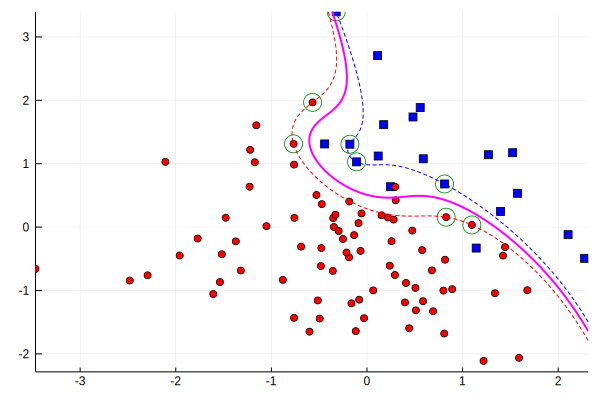

In [141]:
using JuMP, Ipopt

ϕ(x) = [x[1], x[2], x[1]^2, x[2]^2, x[1] * x[2], x[1]^3, x[1]^2 * x[2], x[1] * x[2]^2, x[2]^3]
C = 1e3

model = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0))

@variable(model, 0 ≤ α[i=1:n] ≤ C)

@objective(model, Max, sum(α) -
    0.5 * sum(α[i] * α[j] * y[i] * y[j] * dot(ϕ(X[i,:]), ϕ(X[j,:])) for i = 1:n, j = 1:n))
@constraint(model, sum(α .* y) == 0)

optimize!(model)


plot(leg=false)

α = value.(α)
I = findall(1e-4 .< α .< C - 1e-4)
J = findall(α .> 1e-4)

w = sum(α[i] * y[i] * ϕ(X[i,:]) for i = J)
k = I[1]
b = y[k] - dot(w, ϕ(X[k,:]))

scatter!(X[I,1], X[I,2], c=:green, m=(:white,stroke(1,:green),10))

I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

x1g = range(extrema(X[:,1])..., length=400)
x2g = range(extrema(X[:,2])..., length=400)

contour!(x1g, x2g, (x1, x2) -> dot(w, ϕ([x1; x2])) + b, levels=[0.0], c=:magenta, lw=2)
contour!(x1g, x2g, (x1, x2) -> dot(w, ϕ([x1; x2])) + b, levels=[1.0], c=:blue, l=:dash)
contour!(x1g, x2g, (x1, x2) -> dot(w, ϕ([x1; x2])) + b, levels=[-1.0], c=:red, l=:dash)

xlims!(extrema(X[:,1])...)
ylims!(extrema(X[:,2])...)

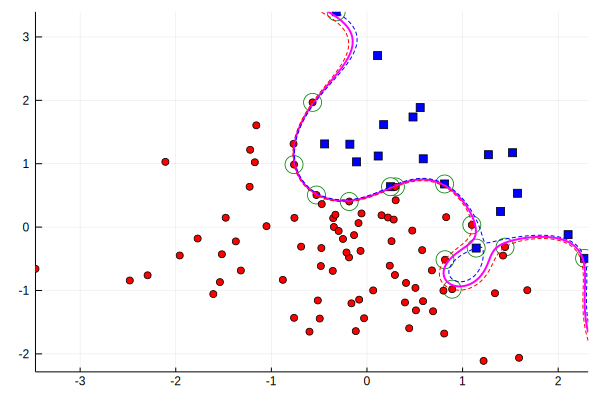

In [148]:
using JuMP, Ipopt

σ = 1
K(x1, x2) = exp(-norm(x1 - x2)^2 / 2σ^2)
Kmat = [K(X[i,:], X[j,:]) for i = 1:n, j = 1:n]
C = 1e6

model = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0))

@variable(model, 0 ≤ α[i=1:n] ≤ C)

@objective(model, Max, sum(α) -
    0.5 * sum(α[i] * α[j] * y[i] * y[j] * Kmat[i,j] for i = 1:n, j = 1:n))
@constraint(model, sum(α .* y) == 0)

optimize!(model)

plot(leg=false)

α = value.(α)
I = findall(1e-4 .< α .< C - 1e-4)
J = findall(α .> 1e-4)

k = I[1]
b = y[k] - sum(α[i] * y[i] * K(X[i,:], X[k,:]) for i = J)

scatter!(X[I,1], X[I,2], c=:green, m=(:white,stroke(1,:green),10))

I = findall(y .== 1)
scatter!(X[I,1], X[I,2], c=:blue, m=:square)
I = findall(y .== -1)
scatter!(X[I,1], X[I,2], c=:red, m=:circle)

x1g = range(extrema(X[:,1])..., length=400)
x2g = range(extrema(X[:,2])..., length=400)

F(x) = sum(α[i] * y[i] * K(x, X[i,:]) for i = J) + b
contour!(x1g, x2g, (x1, x2) -> F([x1; x2]), levels=[0.0], c=:magenta, lw=2)
contour!(x1g, x2g, (x1, x2) -> F([x1; x2]), levels=[1.0], c=:blue, l=:dash)
contour!(x1g, x2g, (x1, x2) -> F([x1; x2]), levels=[-1.0], c=:red, l=:dash)

xlims!(extrema(X[:,1])...)
ylims!(extrema(X[:,2])...)